<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythonによるデータ科学入門 DAY 10 スライド中のコード 

In [ ]:
# coding: utf-8
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

data = wavfile.read('voice.wav')
framerate = data[0]
X = data[1]
N = len(X)
frames=np.linspace(0,N/framerate,N)

freq = np.linspace(0,1.0,N)*framerate
Y = np.fft.fft(X)
AMP2 = np.absolute(Y*2/N)**2

fmax = AMP2.argmax()/N*framerate
print(fmax,'Hz')

plt.plot(freq[1:N//2], AMP2[1:N//2], 
         color=(1.0,0.0,0.0), 
         linewidth=1.0)
plt.xlabel('FREQ [Hz]')
plt.ylabel('AMPLITUDE^2')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


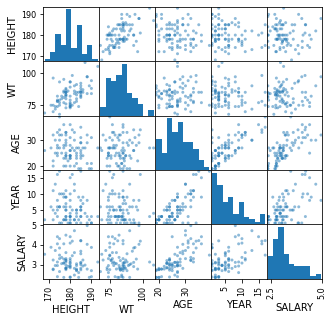

In [ ]:
# coding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('rakuten-2021.xlsx')
data = data.rename(columns={'身長[cm]':'HEIGHT','体重[kg]':'WT','年齢':'AGE',
                            '在籍年数':'YEAR', '推定年俸[万円]':'SALARY'})
data['SALARY'] = data['SALARY'].apply(np.log10)
pd.plotting.scatter_matrix(data, alpha=0.5, figsize=(5, 5))
plt.show()

In [ ]:
# coding: utf-8
import numpy as np
import pandas as pd

data = pd.read_excel('rakuten-2021.xlsx')
data['推定年俸[万円]'] = data['推定年俸[万円]'].apply(np.log10)

X = data.to_numpy().T
ndata = X.shape[1]

mean = np.mean(X,1)
stdev = np.std(X,1)
for i in range(5):
    X[i,:] = (X[i,:]-mean[i])/stdev[i]

C = X.dot(X.T) / ndata

lmda,P = np.linalg.eig(C)

print(lmda)

print("Contribution:")
for k in range(5):
    print(k,lmda[k]/np.sum(lmda))

for k in range(5):
    print("Loadings for component",k)
    p2 = np.sum( P[:,k]**2 )
    for ell in range(5):
        loading = np.sqrt(lmda[k])*P[ell,k] / ( np.sqrt(C[ell,ell] * p2 ) )
        print(ell,loading)


[2.38226204 1.52368001 0.21471155 0.47964293 0.39970347]
Contribution:
0 0.4764524074852356
1 0.3047360022964659
2 0.04294230925940746
3 0.09592858632075525
4 0.07994069463813572
Loadings for component 0
0 -0.34843287895921826
1 -0.15453673503390966
2 0.9087674592437851
3 0.8626619040221838
4 0.8166585015658891
Loadings for component 1
0 -0.8009747607514195
1 -0.8784455343802668
2 -0.17880323302091766
3 -0.028710884437461462
4 -0.27867180737381536
Loadings for component 2
0 0.08096450449465938
1 -0.0921890530485927
2 0.35886460293354683
3 -0.22015520530955693
4 -0.1496841880207454
Loadings for component 3
0 0.43575930330028473
1 -0.33323410226272293
2 -0.047594275537368294
3 0.3643445242996103
4 -0.20904460487931126
Loadings for component 4
0 0.20147590451113773
1 -0.29138986296641567
2 -0.10546132266515088
3 -0.27161531188730315
4 0.43509299307457366


Eigenvalues:
[2.39129524 1.51855715 0.22940196 0.45112317 0.41124792]
Loadings:
[[-0.20734966  0.62773577]
 [-0.00515308  0.8612615 ]
 [ 0.94767354  0.03558603]
 [ 0.76422376 -0.12763984]
 [ 0.73700317  0.09762678]]


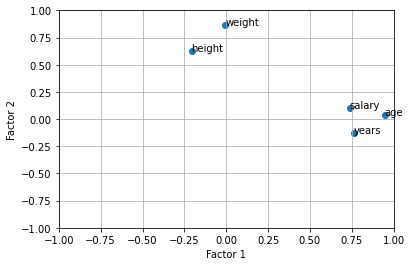

In [ ]:
# coding: utf-8
from sklearn.decomposition import FactorAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('rakuten-2021.xlsx')
data['推定年俸[万円]'] = data['推定年俸[万円]'].apply(np.log10)

X = data.to_numpy()
ndata = X.shape[0]

mean = np.mean(X,0)
stdev = np.std(X,0)

for i in range(5):
    X[:,i] = (X[:,i]-mean[i])/stdev[i]

fa = FactorAnalysis(2)
fa.fit(X)

corr_mat = fa.get_covariance()
eig = np.linalg.eig(corr_mat)
print('Eigenvalues:')
print(eig[0])

Y = fa.components_.T
print('Loadings:')
print(Y)

plt.scatter(Y[:,0],Y[:,1])
labels=['height','weight','age','years','salary']
for i,label in enumerate(labels):
    plt.annotate(label, (Y[i,0], Y[i,1]))
plt.grid()
plt.xlabel('Factor 1')
plt.xlim(-1,1)
plt.ylabel('Factor 2')
plt.ylim(-1,1)
plt.show()

In [ ]:
# coding: utf-8
import pandas as pd
import numpy as np

data = pd.read_csv('food-table.csv')
# print(data.dtypes)

cols=('ENERC','WATER','PROTAIN','PROTCAA','FAT','FATNLEA','FASAT','FAMS','FAPU','CHOLE','CH','CHOAVLM',
      'FIBSOL','FIBINS','FIBTG','ASH','NA','K','CA','MG','P','FE','ZN','CU','MN','ID','SE','CR','MO','RETOL',
      'CARTA' ,'CARTB' ,'CRYPXB','CARTBEQ','VITA_RAE','VITD','TOCPHA','TOCPHB','TOCPHG','TOCPHD','VITK','THIAHCL',
      'RIBF','NIA','VITB6A','VITB12','FOL','PANTAC','BIOT','VITC')

X = np.array(pd.DataFrame(data,columns=cols),dtype='float').T
N = X.shape[1]
M = X.shape[0]

mean = np.mean(X,axis=1)
stdev = np.std(X,axis=1)
for i in range(M):  # 標準化
    X[i,:] = (X[i,:]-mean[i])/stdev[i]

C = X.dot(X.T) / N
lmda,P = np.linalg.eig(C)
print(lmda)

print("Contribution:")
for k in range(M):
    print(k,lmda[k]/np.sum(lmda))

print("==============")
for k in range(M):
    print("Loadings for component",k)
    p2 = np.sum( P[k,:]**2 )
    loadings=[]
    for ell in range(M):
        loading = np.sqrt(lmda[k])*P[ell,k] / np.sqrt(C[ell,ell] * p2 )
        loadings.append([ell,cols[ell],loading])
    loadings_sorted = sorted(loadings, key=lambda x: abs(x[2]), reverse=True)
    for ell,name,loading in loadings_sorted:
        print(ell,name,loading)
    print("--------------")


[7.69814857e+00 5.64725159e+00 3.97175345e+00 3.15954690e+00
 2.44576171e+00 2.16698960e+00 1.86022954e+00 1.63810074e+00
 1.60577526e+00 1.43132092e+00 1.21612664e+00 1.11236853e+00
 1.07025736e+00 1.04464385e+00 9.77542326e-01 9.44397171e-01
 9.08439140e-01 8.79082972e-01 8.12969580e-01 7.66649875e-01
 7.34865853e-01 6.90239465e-01 6.32009232e-01 6.08547268e-01
 5.69988892e-01 5.21793639e-01 4.89638134e-01 4.78382085e-01
 4.45852432e-01 4.10397667e-01 3.89234106e-01 3.46411428e-01
 2.95565939e-01 2.55754310e-01 2.44915618e-01 2.37244336e-01
 2.27640122e-01 2.18425950e-01 2.09054676e-01 1.88560104e-01
 1.61228541e-01 1.10354204e-01 1.23992830e-01 3.24783588e-02
 1.24399810e-02 4.24390009e-03 2.18601544e-03 1.13921802e-03
 3.69642942e-06 5.62622345e-05]
Contribution:
0 0.1539629714818193
1 0.11294503186730472
2 0.07943506904861794
3 0.06319093793995169
4 0.0489152342166939
5 0.04333979202259979
6 0.03720459089825006
7 0.03276201479761106
8 0.03211550512114677
9 0.028626418494595705
10 